In [48]:
import pandas as pd
import numpy
import scipy
import os

df0 = pd.read_excel(os.path.expanduser('~/Downloads/Hackathon Data.xlsx'))

In [76]:
df = df0.copy()
del df["PROMO_PRICE"], df["COMPETITOR_PRICE"]
df.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE2,COMPETITOR_PRICE2,Inventory,DAILY_UNITS
0,214,2017-05-28,MISC ACCY,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,19.99,19.99,19.99,Out-of-Stock,0
1,329,2017-05-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,16.99,16.99,16.99,Out-of-Stock,0
2,66,2017-05-28,MIRRORLESS LENSES,LENSES,ML - ILC Cameras/Lenses,VP - Digital Imaging,399.99,399.99,399.99,Fully-Stocked,0
3,406,2017-05-28,DECK HARNESS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,34.99,34.99,34.99,Out-of-Stock,0
4,292,2017-05-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,49.99,49.99,Out-of-Stock,0


In [50]:
from sklearn.preprocessing import OrdinalEncoder

df["class_code"] = OrdinalEncoder().fit_transform(df[["CLASS_NAME"]])
df["subclass_code"] = OrdinalEncoder().fit_transform(df[["SUBCLASS_NAME"]])


In [93]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df,
    test_size=0.15, random_state=2023)


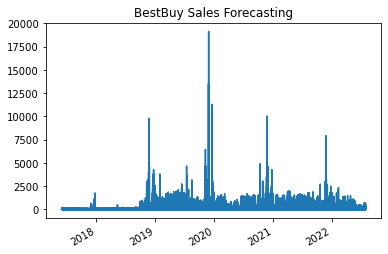

In [78]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_data(df, x_variable, y_variable, title):
    """
    Plot the x- and y- variables against each other, where the variables are columns in
    a pandas dataframe
    Args:
        df: Pandas dataframe. 
        x_variable: String. Name of x-variable column
        y_variable: String. Name of y-variable column
        title: String. Desired title name
    """
    fig, ax = plt.subplots()
    ax.plot_date(df[x_variable], 
                 df[y_variable], marker='', linestyle='-', label=y_variable)
    fig.autofmt_xdate()
    plt.title(title)
    plt.show()

#### EXECUTE IN MAIN FUNCTION ####

#Declare desired series ID
series_ID='Encoded_SKU_ID'


#Convert the Date column into a date object
df['SALES_DATE']=pd.to_datetime(df['SALES_DATE'], format='%Y-%m-%d')


#Plot the time series
plot_data(df, 'SALES_DATE', 
          'DAILY_UNITS', 
          'BestBuy Sales Forecasting')

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm_api

def decompose_time_series(series):
    """
    Decompose a time series and plot it in the console
    Arguments: 
        series: series. Time series that we want to decompose
    Outputs: 
        Decomposition plot in the console
    """
    result = seasonal_decompose(series, model='additive', period=1)
    result.plot()
    plt.show()


#Decompose the time series to determine seasonality/trend
df2 = df[df['Encoded_SKU_ID'] == 214]
decompose_time_series(df2['DAILY_UNITS'] )

ImportError: cannot import name 'Literal' from 'statsmodels.compat.python' (/Users/samcourson/opt/anaconda3/lib/python3.9/site-packages/statsmodels/compat/python.py)

In [97]:
import itertools

def sarima_parameter_search(search_range, seasonal = [365]):
    """
    Get all of the parameter combinations for a SARIMA model.
    """
    p = q = d = range(0, search_range)
    trend = ['n','c','t','ct']
    pdq = list(itertools.product(p, d, q))
    pdq_combinations = [(x[0], x[1], x[2], x[3], x[4]) for x in list(itertools.product(p, d, q, seasonal, trend))]
    return pdq, pdq_combinations

### EXECUTE IN MAIN FUNCTION ###
order_combos, seasonal_order_combos = sarima_parameter_search(search_range = 2)

order_combos, seasonal_order_combos

([(0, 0, 0),
  (0, 0, 1),
  (0, 1, 0),
  (0, 1, 1),
  (1, 0, 0),
  (1, 0, 1),
  (1, 1, 0),
  (1, 1, 1)],
 [(0, 0, 0, 365, 'n'),
  (0, 0, 0, 365, 'c'),
  (0, 0, 0, 365, 't'),
  (0, 0, 0, 365, 'ct'),
  (0, 0, 1, 365, 'n'),
  (0, 0, 1, 365, 'c'),
  (0, 0, 1, 365, 't'),
  (0, 0, 1, 365, 'ct'),
  (0, 1, 0, 365, 'n'),
  (0, 1, 0, 365, 'c'),
  (0, 1, 0, 365, 't'),
  (0, 1, 0, 365, 'ct'),
  (0, 1, 1, 365, 'n'),
  (0, 1, 1, 365, 'c'),
  (0, 1, 1, 365, 't'),
  (0, 1, 1, 365, 'ct'),
  (1, 0, 0, 365, 'n'),
  (1, 0, 0, 365, 'c'),
  (1, 0, 0, 365, 't'),
  (1, 0, 0, 365, 'ct'),
  (1, 0, 1, 365, 'n'),
  (1, 0, 1, 365, 'c'),
  (1, 0, 1, 365, 't'),
  (1, 0, 1, 365, 'ct'),
  (1, 1, 0, 365, 'n'),
  (1, 1, 0, 365, 'c'),
  (1, 1, 0, 365, 't'),
  (1, 1, 0, 365, 'ct'),
  (1, 1, 1, 365, 'n'),
  (1, 1, 1, 365, 'c'),
  (1, 1, 1, 365, 't'),
  (1, 1, 1, 365, 'ct')])

In [110]:
def seasonal_arima_model(time_series, order, seasonal_order, trend):
    """
    Generate a seasonal ARIMA model using a set of hyperparameters. Returns the model fit, and the 
    associated model AIC and BIC values.
    """ 
    try:
        model = sm_api.tsa.SARIMAX(time_series, 
                                   order=order, 
                                   seasonal_order=seasonal_order, 
                                   trend = trend,
                                   enforce_stationarity=False, 
                                   enforce_invertibility=False)
        model_fit = model.fit()
        #Print the model results
        print(model_fit.summary())
        return model_fit, model_fit.aic, model_fit.bic
    except:
        print("Could not fit with the designated model parameters")
        return None, None, None


In [96]:
### EXECUTE IN MAIN FUNCTION ###
lowest_aic_val = 100000000000
#Generate  model for each of hyperparameter combination in a loop


for order_combo in order_combos:
    for seasonal_order_combo in seasonal_order_combos:
        #Convert the combination to list format
        seasonal_order_combo = list(seasonal_order_combo)
        
        #Generate the SARIMA model
        model_fit, model_aic, model_bic = seasonal_arima_model(time_series = df_train, 
                                                    order = order_combo, 
                                                    seasonal_order = seasonal_order_combo[0:4],
                                                    trend = seasonal_order_combo[-1])
        #Test model performance, and keep running tab of best performing model
        #Set with the newest value if the lowest_aic_value hasn't yet been calculated (on first run),
        #or if the newly calculated model AIC is lower than the lowest calculated AIC value
        if (model_aic < lowest_aic_val):
            lowest_aic_val = model_aic
            best_model = model_fit
            best_order = order_combo
            best_seasonal_order = seasonal_order_combo
            
#Print the best model parameters after the 
print("Best model paramaters: order-- ", best_order, ", seasonal order-- ", best_seasonal_order)

Could not fit with the designated model parameters


TypeError: '<' not supported between instances of 'NoneType' and 'int'